In [ ]:
#import all necessary libraries 
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#check status code of the website
url = "https://www.goat.com/collections/top-100"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.google.com/",
}

r = requests.get(url, headers=headers)

print("Status Code:", r.status_code)
print("r.ok:", r.ok)


Status Code: 200
r.ok: True


In [5]:
soup = BeautifulSoup(r.text)

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-us">
 <head>
  <meta charset="utf-8"/>
  <link href="/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="/favicon.ico" rel="icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="#000" name="theme-color"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="width=device-width, initial-scale=1.0 maximum-scale=1.0" name="viewport"/>
  <meta content="/images/icons/goat-logo-512.png" property="og:image"/>
  <link href="https://www.goat.com/collections/top-100" hreflang="en-us" rel="alternate"/>
  <link href="https://www.goat.com/en-gb/collections/top-100" hreflang="en-gb" rel="alternate"/>
  <link href="https://www.goat.com/en-ca/collections/top-100" hreflang="en-ca" rel="alternate"/>
  <link href="https://www.goat.com/fr-ca/collections/top-100" hreflang="fr-ca" rel="alternate"/>
  <link href="https://www.goat.com/en-au/collections/top-100" hreflang="en-au" rel="alternate"/>
  <link href="https:

In [7]:
# Initialize Selenium WebDriver
service = Service()
driver = webdriver.Chrome(service=service)

# Lists to store extracted data
shoe_names = []
release_dates = []
prices = []
ranking = []
product_links = []

try:
    driver.get("https://www.goat.com/collections/top-100")
    driver.maximize_window()
    
    # Scroll down multiple times to load more products
    for _ in range(30):  
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.PAGE_DOWN)
        time.sleep(2)  # Allow time for new content to load

    # Wait until a specific product element is visible (this is a more precise way to wait)
    wait = WebDriverWait(driver, 15)
    product_container = wait.until(
        EC.presence_of_element_located((By.CLASS_NAME, "GridStyles__GridWrapper-sc-1cm482p-1"))
    )

    # Now that the page is fully loaded, get the page source
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")

    # Debugging: Print out the first 500 characters of the HTML to see the page structure
    print(soup.prettify()[:500])

    # Extract shoe names
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product_name'}):
        name = product.get_text(strip=True)
        shoe_names.append(name)
    
    # Extract release dates
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product_release_date'}):
        date = product.get_text(strip=True)
        release_dates.append(date)
    
    # Extract prices
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product_price'}):
        price = product.find('span', class_='LocalizedCurrency__Amount-sc-yoa0om-0')
        if price:
            prices.append(price.get_text(strip=True))
        else:
            prices.append('N/A')
    
    # Extract rankings
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product'}):
        rank = product.get('data-grid-cell-position')
        ranking.append(rank)
    
    # Extract product links
    for product in soup.find_all('div', {'data-qa': 'grid_cell_product'}):
        try:
            # Find the <a> tag and extract the 'href' attribute
            link = product.find('a', {'class': 'GridCellLink__Link-sc-2zm517-0 gIRmBZ'})
            if link:
                full_link = "https://www.goat.com" + link.get('href')
                product_links.append(full_link)
            else:
                product_links.append('None')
        except AttributeError:
            product_links.append('None')

finally:
    driver.quit()  # Ensure browser closes properly

print(f"Shoe Names Length: {len(shoe_names)}")
print(f"Release Dates Length: {len(release_dates)}")
print(f"Prices Length: {len(prices)}")
print(f"Ranking Length: {len(ranking)}")
print(f"Product Links Length: {len(product_links)}")



<html lang="en-us">
 <head>
  <meta charset="utf-8"/>
  <link href="/images/icons/apple-touch-icon.png" rel="apple-touch-icon"/>
  <link href="/favicon.ico" rel="icon"/>
  <link href="/manifest.json" rel="manifest"/>
  <meta content="#000" name="theme-color"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="width=device-width, initial-scale=1.0 maximum-scale=1.0" name="viewport"/>
  <meta content="/images/icons/goat-logo-512.png" property="og:image"/>
  <link href="h
Shoe Names Length: 182
Release Dates Length: 182
Prices Length: 182
Ranking Length: 182
Product Links Length: 182


In [8]:
df = pd.DataFrame({'rank': ranking, 'shoe': shoe_names, 'price': prices, 'release_date': release_dates, 'product_link': product_links})
df 

,rank,shoe,price,release_date,product_link
0,1,Air Jordan 5 Retro OG 'Black Metallic Reimagined',$276,Feb 08,https://www.goat.com/sneakers/air-jordan-5-og-...
1,2,Air Jordan 3 Retro 'Black Cat' 2025,$228,Jan 11,https://www.goat.com/sneakers/air-jordan-3-ret...
2,3,Air Jordan 11 Retro 'Legend Blue / Columbia' 2024,$190,2024,https://www.goat.com/sneakers/air-jordan-11-re...
3,4,Gel 1130 'Black Pure Silver',$113,2023,https://www.goat.com/sneakers/gel-1130-black-p...
4,5,Air Jordan 12 Retro 'Flu Game' 2025,$274,Mar 01,https://www.goat.com/sneakers/air-jordan-12-re...
...,...,...,...,...,...
177,178,Air Jordan 3 Retro GS 'Lucky Shorts',$92,Feb 22,https://www.goat.com/sneakers/air-jordan-3-ret...
178,179,Air Jordan 5 Retro OG TD 'Black Metallic Reima...,$110,Feb 08,https://www.goat.com/sneakers/air-jordan-5-ret...
179,180,Wmns Cortez 'Valentine's Day 2025',$106,Feb 10,https://www.goat.com/sneakers/wmns-cortez-vale...
180,181,1906A 'Deep Blue',$169,Jan 22,https://www.goat.com/sneakers/1906a-deep-blue-...


In [ ]:
#Save the dataframe to a csv file
df.to_csv('goat_top_100.csv', index=False)

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_13597/3048043393.py:7: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


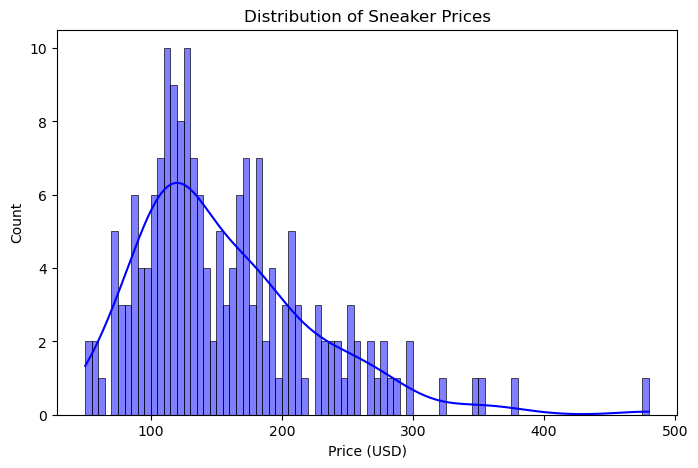

In [ ]:
# Convert price column to numeric (remove '$' and convert to float)
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)

# Plot histogram of sneaker prices in $5 bins with trend line
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=range(int(df["price"].min()), int(df["price"].max()) + 5, 5), kde=True, color="blue")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Distribution of Sneaker Prices")
plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/s5/w23ysbrd4mb00w78_80t58tm0000gn/T/ipykernel_13597/385794938.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)  # Convert price


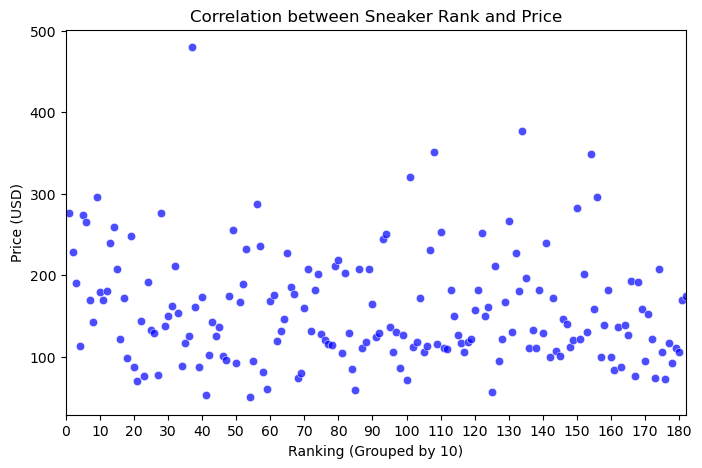

Correlation between Rank and Price: -0.13


In [10]:
df["rank"] = pd.to_numeric(df["rank"], errors="coerce")  # Convert rank to numeric
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)  # Convert price

# Scatter plot of ranking vs. price with x-axis tick marks every 10
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["rank"], y=df["price"], color="blue", alpha=0.7)

# Get max rank and ensure x-axis extends fully
max_rank = int(df["rank"].max())
plt.xticks(np.arange(0, max_rank + 1, 10))  # Ensure tick marks go up to 182
plt.xlim(0, max_rank)  # Force x-axis to go up to max rank

plt.xlabel("Ranking (Grouped by 10)")
plt.ylabel("Price (USD)")
plt.title("Correlation between Sneaker Rank and Price")
plt.show()

# Compute correlation
correlation = df["rank"].corr(df["price"])
print(f"Correlation between Rank and Price: {correlation:.2f}")